In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['PM1y1', 'NOy1', 'NO2y1', 'NOxy1','RHy1', 'WDy1','BPy1','PM1y2', 'NOy2', 'NO2y2', 'NOxy2','RHy2', 'WDy2','BPy2','PM1y3', 'NOy3', 'NO2y3', 'NOxy3','RHy3', 'WDy3','BPy3','year', 'month', 'day']]
Y1 = df['Ozone']

In [8]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [9]:
#xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=10)

In [26]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=7,
                                      max_features='sqrt',
                                      min_samples_split=3,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=7, max_features='sqrt',
                          min_samples_leaf=5, min_samples_split=3,
                          n_estimators=2000)

In [27]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9102516832995935

Score on test data: 0.15365392003687284

Root Mean Squared Error: 16.279653456732206

Overall model accuracy: 0.15365392003687284


In [28]:
test=data.loc['207':'259']
X=test[['PM1y1', 'NOy1', 'NO2y1', 'NOxy1','RHy1', 'WDy1','BPy1','PM1y2', 'NOy2', 'NO2y2', 'NOxy2','RHy2', 'WDy2','BPy2','PM1y3', 'NOy3', 'NO2y3', 'NOxy3','RHy3', 'WDy3','BPy3','year', 'month', 'day']]
X

,PM1y1,NOy1,NO2y1,NOxy1,RHy1,WDy1,BPy1,PM1y2,NOy2,NO2y2,...,PM1y3,NOy3,NO2y3,NOxy3,RHy3,WDy3,BPy3,year,month,day
207,428.861429,125.535714,76.847143,144.901429,64.444286,201.848571,992.431429,371.975714,80.651429,81.828571,...,416.398571,100.627143,83.730000,212.015714,65.350000,219.218571,734.987143,2019,12,29
208,456.537143,109.870000,52.067143,117.267143,71.032857,190.068571,991.651429,452.655714,174.377143,78.085714,...,332.717143,98.832857,67.225714,194.864286,73.302857,194.622857,735.531429,2020,1,5
209,349.680000,84.832857,58.215714,100.144286,60.418571,195.667143,990.642857,344.172857,75.938571,86.725714,...,282.434286,101.944286,57.842857,190.755714,73.417143,178.474286,735.414286,2020,1,12
210,405.144286,117.140000,58.545714,126.631429,62.968571,191.431429,991.448571,405.398571,71.592857,79.045714,...,346.604286,94.412857,75.028571,195.770000,60.464286,224.265714,732.054286,2020,1,19
211,223.215604,34.865714,44.648571,52.171429,69.247143,183.401429,993.708571,302.185714,74.328571,68.768571,...,237.858571,49.015714,68.434286,127.910000,63.667143,205.961429,727.997143,2020,1,26
212,225.330769,47.905714,49.550000,65.417143,64.004286,199.584286,990.021429,284.925714,32.171429,40.208571,...,251.350000,74.012857,62.091429,156.391429,71.321429,201.948571,727.672857,2020,2,2
213,198.920769,65.595714,50.381429,80.275714,68.345714,181.917143,995.670000,331.052857,112.367143,104.145714,...,328.171429,153.021429,66.960000,268.622857,70.425714,192.517143,735.524286,2020,2,9
214,333.581429,73.142857,72.708571,98.288571,68.392857,188.734286,991.444286,204.577143,35.207143,61.682857,...,279.338571,50.672857,67.874286,129.678571,58.125714,216.392857,735.264286,2020,2,16
215,192.155714,68.825714,73.708571,96.087143,61.525714,181.485714,994.125714,330.682857,122.750000,91.308571,...,275.608571,34.234286,82.401429,120.168571,56.437143,232.758571,732.928571,2020,2,23
216,172.547857,86.743571,88.330000,117.698571,63.528571,180.118571,991.534286,228.510000,79.125714,77.098571,...,280.377143,38.925714,62.438571,108.778571,47.897143,234.928571,726.498571,2020,3,1


In [29]:
predict=grad_boost.predict(X)

In [30]:
predict

array([41.24941461, 34.56839332, 42.39861174, 39.59661481, 41.35191901,
       38.75693625, 40.71451465, 44.0794424 , 46.133994  , 45.96756455,
       49.22997125, 52.95073725, 55.25469738, 54.81453164, 60.80726337,
       57.66681817, 62.10983577, 62.54930252, 63.54100398, 62.70746553,
       61.69018375, 60.33087952, 67.26428287, 43.36171741, 52.45909944,
       52.54176599, 50.65075182, 32.80607929, 36.0457473 , 31.11506006,
       31.15123401, 30.93420691, 31.14291606, 31.08457908, 32.05083299,
       29.66735456, 31.32743211, 31.26097142, 32.13337386, 35.54248943,
       41.36135137, 45.64653453, 47.78741944, 50.84393691, 46.21803043,
       41.59316039, 39.2738438 , 41.32469132, 43.77900214, 42.45086945,
       45.32320225, 35.73847196, 40.23466104])

In [31]:
dates=data.loc['207':'259','From Date']

In [32]:
X['From Date']=dates.values

In [33]:
X.columns

Index(['PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'RHy1', 'WDy1', 'BPy1', 'PM1y2',
       'NOy2', 'NO2y2', 'NOxy2', 'RHy2', 'WDy2', 'BPy2', 'PM1y3', 'NOy3',
       'NO2y3', 'NOxy3', 'RHy3', 'WDy3', 'BPy3', 'year', 'month', 'day',
       'From Date'],
      dtype='object')

In [34]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [35]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [36]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [37]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

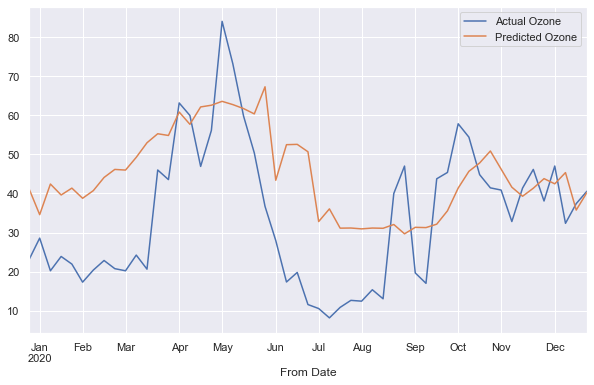

In [38]:
test['Ozone'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted Ozone')

In [39]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

17.692452030232428

In [40]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.174170629796217
MSE: 265.02711667129284
RMSE: 16.279653456732206
R-Squared: 0.15365392003687284


In [41]:
mae = metrics.mean_absolute_error(test['Ozone'],X['pred'])
mse = metrics.mean_squared_error(test['Ozone'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['Ozone'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 14.963713749114925
MSE: 313.0228588420756
RMSE: 17.692452030232428
R-Squared: -0.021665928308257865


In [42]:
import pickle
filename = 'Ozone_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [43]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.15365392003687284


# 3rd plot

In [44]:
testcase = pd.DataFrame()

In [45]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [46]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [47]:
testcase

,test,pred,Corrected
155,81.874286,68.727561,85.007214
156,44.231429,35.088179,51.367833
157,16.544286,37.496815,21.217162
158,16.497143,41.045714,24.766060
159,18.280000,42.522413,26.242759
160,15.304286,39.326405,23.046752
161,13.075714,46.106621,29.826968
162,13.350000,48.002679,31.723026
163,15.944286,47.344263,31.064610
164,12.685714,50.227661,33.948007


In [48]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [49]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.7011454101692816

In [50]:
test2020=pd.DataFrame()

In [51]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [52]:
test2020.index=test.index

In [53]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

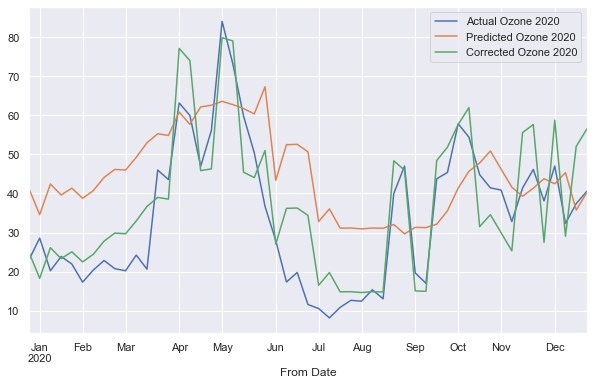

In [54]:
test2020['test'].plot(legend=True, label='Actual Ozone 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone 2020')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone 2020')

In [55]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.7106513281203809